# 2. Tree-Based Methods

## (a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks . The dataset contains a training set and a testset. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn import metrics
import matplotlib.gridspec as gridspec

C:\Users\manja\Anaconda2\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
#df_train=pd.read_csv('aps_failure_training_set.csv',na_values = ['?'])
df_train = pd.read_csv('aps_failure_training_set.csv',skiprows=20,na_values='na')
df_test = pd.read_csv('aps_failure_test_set.csv',skiprows=20,na_values='na')

In [3]:
df_concat=pd.concat([df_train,df_test],axis=0).reset_index(drop=True)
df_train.shape

(60000, 171)

## (b) Data Preparation:This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea. 

### i. Research what types of techniques are usually used for dealing with data with missing values.Pick at least one of them and apply it to this data in the next steps

There are multiple ways to impute the data , we can fill the NAN values with the mean of the column , median of the column ,filling using KNN classifier, forward/backward fill or also the most frequently occuring value in the column.

I have used the mean to fill the NAN values 


In [4]:
df=df_concat.fillna(np.mean(df_concat),inplace = True)

In [5]:
df_train=df.iloc[0:60000,]
df_test=df.iloc[60000:]

In [6]:
df_test.to_csv("test.csv", sep=',', encoding='utf-8')
df_train.to_csv("train.csv",sep=',',enconding='utf-8')

In [7]:
df_train.shape

(60000, 171)

## ii. For each of the 170 features, calculate the coefficient of variation CV = s/m,where s is sample variance and m is sample mean. 




In [8]:
#df_np=df.values
cv =lambda x: np.var(x) / np.mean(x)
var = np.apply_along_axis(cv, axis=0, arr=df.iloc[:,1:])
var


array([  1.14592590e+06,   3.44264572e+00,   1.67478899e+09,
         6.43690272e+09,   3.34827682e+03,   3.59293024e+03,
         1.67659046e+06,   2.13371456e+06,   3.01265507e+06,
         7.17531681e+06,   1.34397441e+07,   9.86353888e+06,
         9.22214236e+06,   3.96131208e+06,   1.40347314e+06,
         5.43816100e+06,   9.82588867e+06,   3.28684866e+06,
         2.17265079e+06,   5.98950607e+06,   5.11496958e+06,
         7.99477380e+06,   1.78007837e+07,   1.57470076e+07,
         9.70693087e+06,   3.65742301e+06,   5.50576136e+01,
         3.20769744e+06,   2.79392820e+06,   2.22271001e+06,
         3.76270249e+04,   5.61455158e+03,   2.50216533e+07,
         2.74905401e+07,   1.66889128e+07,   5.87646181e+06,
         1.10923847e+07,   1.53822328e+07,   9.87992082e+06,
         1.64427087e+07,   1.67813636e+07,   6.94950317e+06,
         6.42675302e+05,   2.44019537e+05,   1.16839659e+06,
         5.02093613e+06,   1.19868216e+07,   2.03401400e+07,
         7.77393190e+06,

In [9]:
col=df.columns.values
df2=pd.DataFrame(np.column_stack([col[1:], var])).drop([0])
df2

,0,1
1,ab_000,3.44265
2,ac_000,1.67479e+09
3,ad_000,6.4369e+09
4,ae_000,3348.28
5,af_000,3592.93
6,ag_000,1.67659e+06
7,ag_001,2.13371e+06
8,ag_002,3.01266e+06
9,ag_003,7.17532e+06
10,ag_004,1.34397e+07



## iii. Plot a correlation matrix for your features using pandas or any other tool.

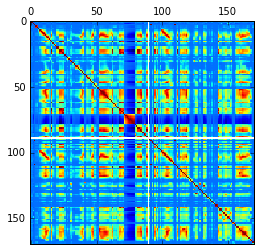

In [10]:
%matplotlib inline
plt.matshow(df.corr())

## iv. Pick b√170c features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

We cannot draw conclusions from the scatter plot directly . The model gets unstable with more correlated variables.

In [28]:
df_hivar=df2.sort_values(1, ascending=False).head(int(math.floor(math.sqrt(170))))
print(df_hivar)
col_new=np.append(df_hivar[0].values,'class')

          0            1
91   cf_000  6.45399e+09
109  co_000  6.44172e+09
3    ad_000   6.4369e+09
145  dq_000  1.95458e+09
2    ac_000  1.67479e+09
155  eb_000  2.04754e+08
134  df_000  8.68172e+07
136  dh_000  5.46045e+07
140  dl_000  4.05069e+07
122  cs_009  3.79863e+07
149  du_000  3.22192e+07
33   ay_001  2.74905e+07
62   bb_000  2.66272e+07


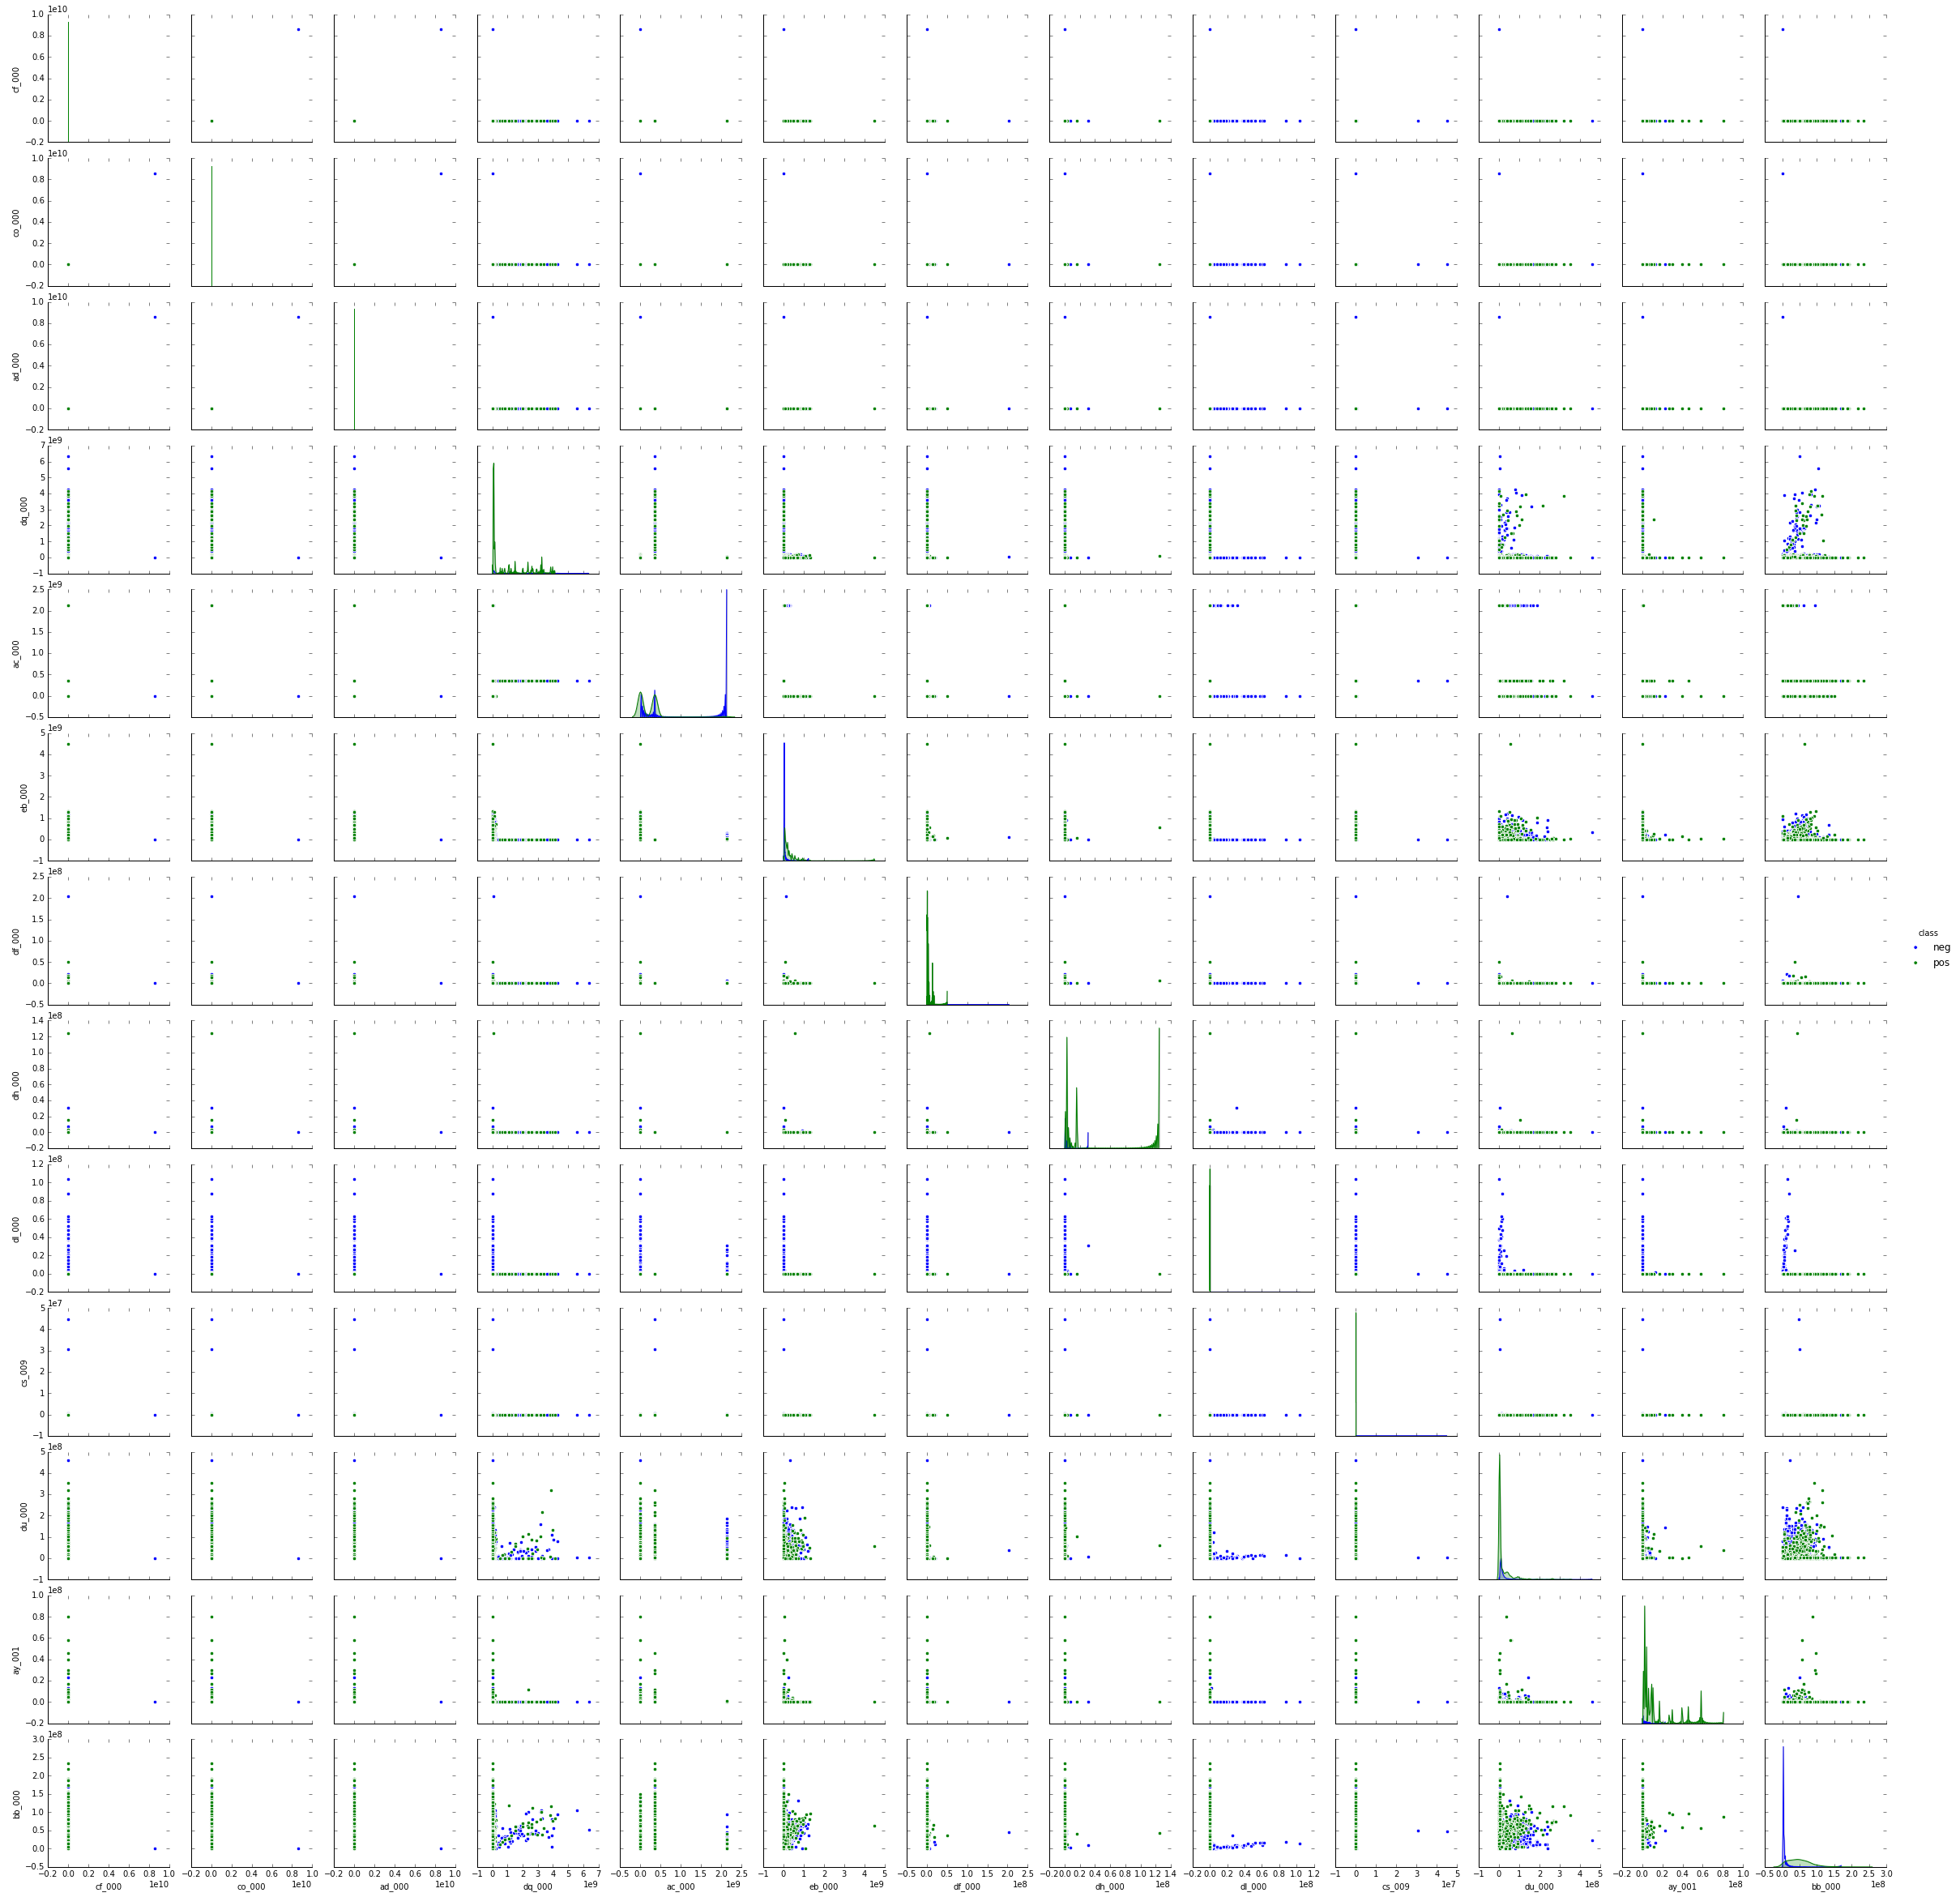

In [12]:
sns.pairplot(df[col_new],hue='class')

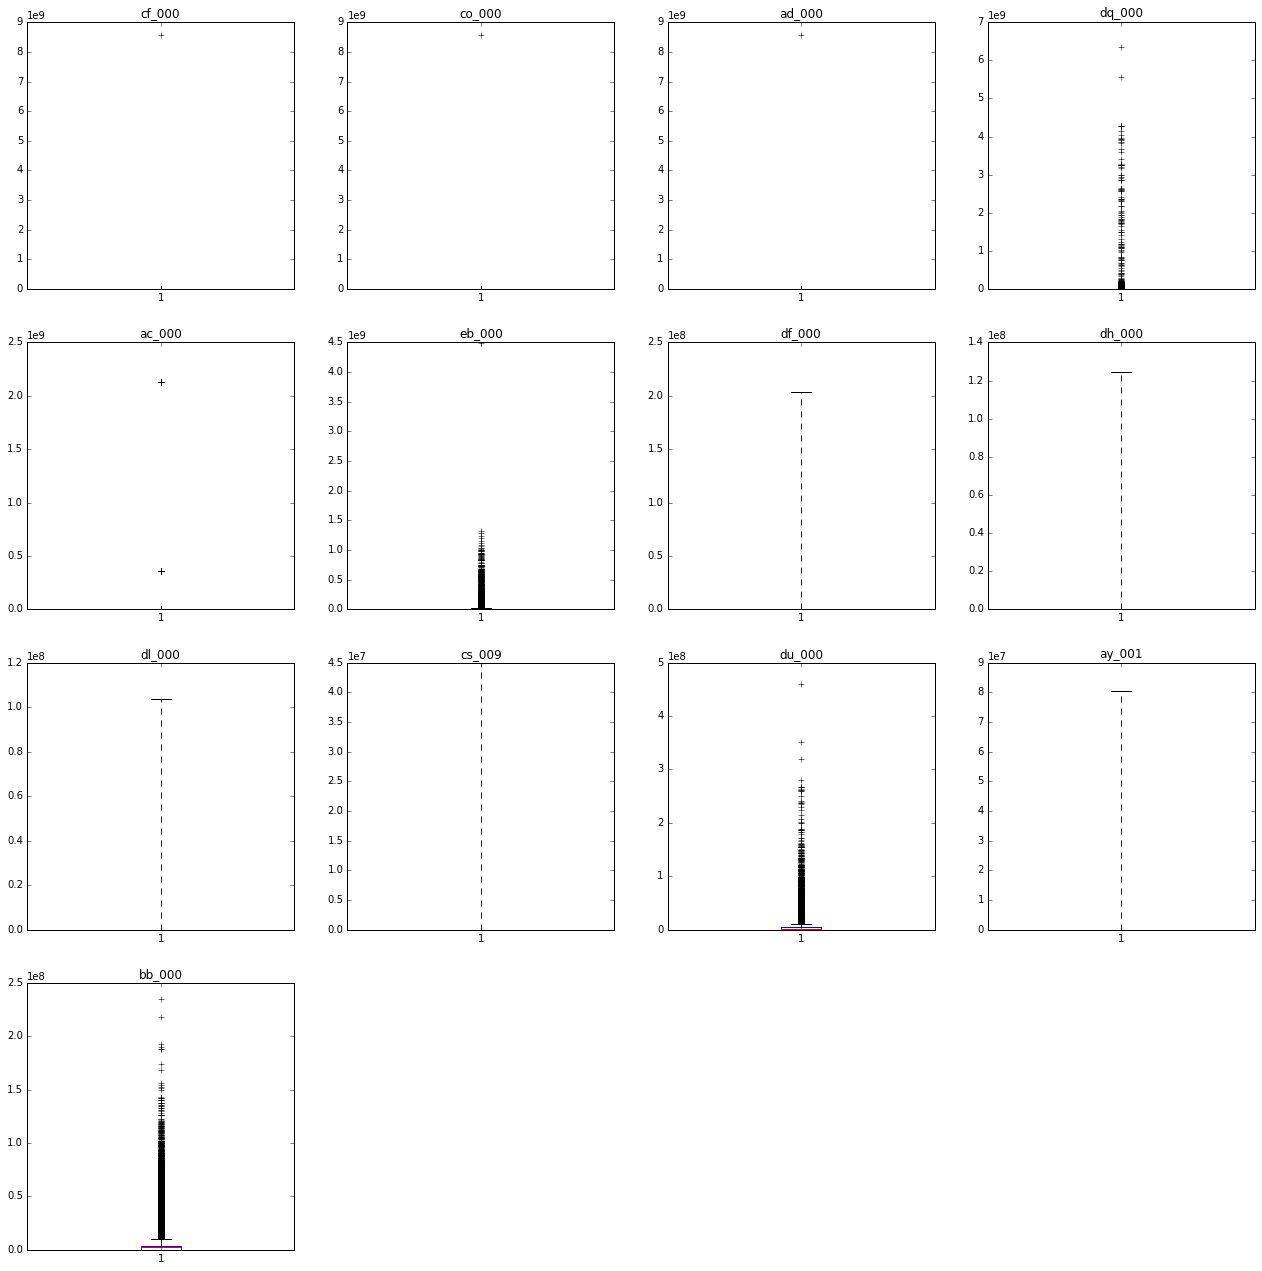

In [34]:
i=0
i=1
fig = plt.figure(figsize=(20,25))
#gridspec.GridSpec(11,6)
for c in df_hivar[0]:
    
    plt.subplot(4,4,i)
    plt.boxplot(df[c])
    plt.title(c)
    i+=1
fig.set_size_inches(w=22,h=22)
plt.show()


## v. Determine the number of positive and negative data. Is this data set imbalanced?


In [35]:
df['class'].value_counts()

neg    74625
pos     1375
Name: class, dtype: int64

## (c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error

In [36]:
df_train.head()
x_train = df_train.iloc[:,1:]
y_train =(df_train.iloc[:,0])
y_train=y_train.map(dict(neg=0, pos=1))
x_test=df_test.iloc[:,1:]
y_test= df_test.iloc[:,0]
y_test=y_test.map(dict(neg=0, pos=1))


In [37]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
model_randcl = RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0,oob_score=True)
model_randcl.fit(x_train,y_train)                             

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [38]:
y_pred= model_randcl.predict(x_test)
conf = metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix for the test set: ")
print(conf)
fpr, tpr, _ = roc_curve(y_test,y_pred)
auc_val = auc(fpr, tpr)
print("AUC for the test set: ")
print(auc_val)

Confusion Matrix for the test set: 
[[15624     1]
 [  304    71]]
AUC for the test set: 
0.594634666667


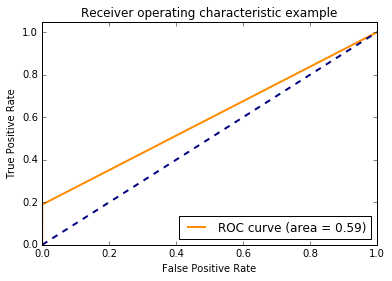

In [39]:
plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [40]:
oob_error = 1 - model_randcl.oob_score_
print('oob score ', oob_error)
print('test set misclassification error', 1 - (float(conf[0][0]+conf[1][1])/float(conf[0][0]+conf[1][1]+conf[0][1]+conf[1][0])))

y_pred=model_randcl.predict(x_train)
conf = metrics.confusion_matrix(y_train,y_pred)
print conf
print('train set misclassification error', 1 - (float(conf[0][0]+conf[1][1])/float(conf[0][0]+conf[1][1]+conf[0][1]+conf[1][0])))

('oob score ', 0.014100000000000001)
('test set misclassification error', 0.019062499999999982)
[[58978    22]
 [  812   188]]
('train set misclassification error', 0.013900000000000023)


 ### We can see the oob_error is less than  test set missclassification error 

## (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.

The problem of class imblalance can be resolved in Random Forests in the following ways:

Making deeper trees (Using more variables in each tree at each split). Basically, if more features are given to each decision tree in the forest, it will classify better between the classes as it gets more information to discriminate.

The second way, which is the most common way is to give equal number of samples from each class to each tree in the Forest. Since the dataset is really imbalanced.
 

In [41]:
# class imbalance 
from sklearn.ensemble import RandomForestClassifier
model_randcl = RandomForestClassifier(n_estimators=200,random_state=0,oob_score=True,class_weight="balanced")
model_randcl.fit(x_train,y_train)  
y_pred= model_randcl.predict(x_test)

conf = metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix for the test set: ")
print(conf)
fpr, tpr, _ = roc_curve(y_test,y_pred)
auc_val = auc(fpr, tpr)
print("AUC for the test set: ")
print(auc_val)

Confusion Matrix for the test set: 
[[15612    13]
 [  163   212]]
AUC for the test set: 
0.782250666667


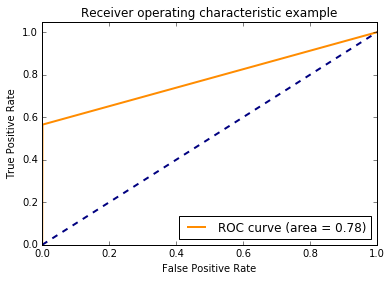

In [42]:
plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [44]:
oob_error = 1 - model_randcl.oob_score_
print('oob score ', oob_error)
print('test set misclassification error', 1 - (float(conf[0][0]+conf[1][1])/float(conf[0][0]+conf[1][1]+conf[0][1]+conf[1][0])))

y_pred=model_randcl.predict(x_train)
conf = metrics.confusion_matrix(y_train,y_pred)
print('train set misclassification error', 1 - (float(conf[0][0]+conf[1][1])/float(conf[0][0]+conf[1][1]+conf[0][1]+conf[1][0])))

('oob score ', 0.0076833333333333753)
('test set misclassification error', 0.01100000000000001)
('train set misclassification error', 0.0)


### The OOB seems to be very less than the test and train classification rate